Using backend: tensorflow.compat.v1

2022-06-21 08:51:07.451097: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
non-resource variables are not supported in the long term



/usr/local/lib/python3.7/dist-packages/skopt/sampler/sobol.py:250: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+1602=1602. 
  total_n_samples))
/usr/local/lib/python3.7/dist-packages/skopt/sampler/sobol.py:250: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+324=324. 
  total_n_samples))
/usr/local/lib/python3.7/dist-packages/skopt/sampler/sobol.py:250: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+322=322. 
  total_n_samples))


Compiling model...
Building feed-forward neural network...
'build' took 0.046311 s



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2022-06-21 08:51:11.258360: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-06-21 08:51:11.339711: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.46GiB deviceMemoryBandwidth: 625.94GiB/s
2022-06-21 08:51:11.342200: I 

'compile' took 5.642220 s

Initializing variables...
Training model...



2022-06-21 08:51:16.906232: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3000030000 Hz
2022-06-21 08:51:17.152190: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


Step      Train loss                                                      Test loss                                                       Test metric   
0         [7.86e-02, 2.44e-01, 1.69e-01, 3.09e-01, 2.32e-01, 9.29e-02]    [7.97e-02, 2.47e-01, 1.69e-01, 3.09e-01, 2.32e-01, 9.29e-02]    [1.41e+00]    


2022-06-21 08:51:18.288791: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


1000      [4.06e-03, 8.41e-03, 4.93e-04, 7.04e-04, 5.48e-04, 2.56e-04]    [5.38e-03, 1.10e-02, 4.93e-04, 7.04e-04, 5.48e-04, 2.56e-04]    [9.02e-01]    
2000      [2.84e-03, 3.82e-03, 1.19e-04, 1.73e-04, 5.58e-05, 5.27e-04]    [5.60e-03, 7.03e-03, 1.19e-04, 1.73e-04, 5.58e-05, 5.27e-04]    [7.82e-01]    
3000      [1.55e-03, 1.49e-03, 1.19e-04, 7.30e-05, 3.81e-05, 6.56e-05]    [1.04e-02, 7.20e-03, 1.19e-04, 7.30e-05, 3.81e-05, 6.56e-05]    [6.73e-01]    
4000      [9.57e-04, 9.05e-04, 2.20e-04, 7.93e-05, 8.65e-05, 8.73e-05]    [1.84e-02, 7.91e-03, 2.20e-04, 7.93e-05, 8.65e-05, 8.73e-05]    [6.55e-01]    
5000      [5.23e-04, 4.72e-04, 1.63e-04, 4.01e-05, 2.61e-05, 2.52e-05]    [2.60e-02, 9.19e-03, 1.63e-04, 4.01e-05, 2.61e-05, 2.52e-05]    [6.61e-01]    
6000      [6.31e-04, 6.15e-04, 5.96e-05, 3.37e-05, 1.66e-05, 2.82e-05]    [2.10e-02, 9.38e-03, 5.96e-05, 3.37e-05, 1.66e-05, 2.82e-05]    [6.54e-01]    
7000      [3.35e-04, 3.94e-04, 1.04e-04, 3.68e-05, 6.04e-05, 5.60e-05]    [2.80e-0

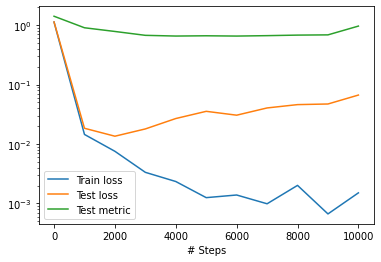

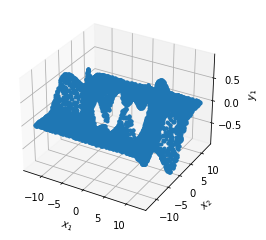

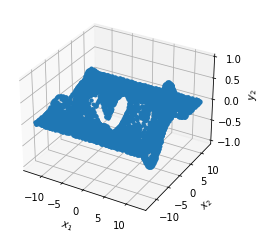

In [1]:
import numpy as np
import scipy
import deepxde as dde
from scipy.special import jv, hankel1

# General parameters
weights = 1
epochs = 10000
parameters = [1e-2, 4, 50, "tanh"]
learning_rate, num_dense_layers, num_dense_nodes, activation = parameters

# Problem parameters
k0 = 1
wave_len = 2 * np.pi / k0
#wave_len = np.pi / k0
#dim_x = 2 * np.pi
dim_x = 4 * wave_len

#R = np.pi / 2.0
R = wave_len

n_wave = 10
h_elem = wave_len / n_wave
nx = int(dim_x / h_elem)

# Computational domain
outer = dde.geometry.Rectangle([-dim_x / 2.0, -dim_x / 2.0], [dim_x / 2.0, dim_x / 2.0])
inner = dde.geometry.Disk([0, 0], R)

geom = dde.geometry.CSGDifference(outer, inner)

# Exact solution
def sound_hard_circle_deepxde(k0, a, points):

    fem_xx = points[:, 0:1]
    fem_xy = points[:, 1:2]
    r = np.sqrt(fem_xx * fem_xx + fem_xy * fem_xy)
    theta = np.arctan2(fem_xy, fem_xx)
    npts = np.size(fem_xx, 0)
    n_terms = np.int(30 + (k0 * a) ** 1.01)

    u_sc = np.zeros((npts), dtype=np.complex128)
    for n in range(-n_terms, n_terms):
        bessel_deriv = jv(n - 1, k0 * a) - n / (k0 * a) * jv(n, k0 * a)
        hankel_deriv = n / (k0 * a) * hankel1(n, k0 * a) - hankel1(n + 1, k0 * a)
        u_sc += (
            -((1j) ** (n))
            * (bessel_deriv / hankel_deriv)
            * hankel1(n, k0 * r)
            * np.exp(1j * n * theta)
        ).ravel()

    return u_sc


# Definition of the pde
def pde(x, y):
    y0, y1 = y[:, 0:1], y[:, 1:2]

    y0_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    y0_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)

    y1_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)
    y1_yy = dde.grad.hessian(y, x, component=1, i=1, j=1)

    return [-y0_xx - y0_yy - k0**2 * y0, -y1_xx - y1_yy - k0**2 * y1]


def sol(x):
    result = sound_hard_circle_deepxde(k0, R, x).reshape((x.shape[0], 1))
    real = np.real(result)
    imag = np.imag(result)
    return np.hstack((real, imag))


# Boundary conditions
def boundary(_, on_boundary):
    return on_boundary


def boundary_outer(_, on_boundary):
    return on_boundary and outer.on_boundary(_)


def boundary_inner(_, on_boundary):
    return on_boundary and inner.on_boundary(_)


def func0_inner(x):
    # result = np.exp(1j * k0 * x[:, 0:1])
    normal = -inner.boundary_normal(x)
    g = 1j * k0 * np.exp(1j * k0 * x[:, 0:1]) * normal[:, 0:1]
    return np.real(-g)


def func1_inner(x):
    # result = np.exp(1j * k0 * x[:, 0:1])
    normal = -inner.boundary_normal(x)
    g = 1j * k0 * np.exp(1j * k0 * x[:, 0:1]) * normal[:, 0:1]
    return np.imag(-g)


def func0_outer(x, y):
    result = -k0 * y[:, 1:2]
    return result


def func1_outer(x, y):
    result = k0 * y[:, 0:1]
    return result


# ABC
bc0_inner = dde.NeumannBC(geom, func0_inner, boundary_inner, component=0)
bc1_inner = dde.NeumannBC(geom, func1_inner, boundary_inner, component=1)

bc0_outer = dde.RobinBC(geom, func0_outer, boundary_outer, component=0)
bc1_outer = dde.RobinBC(geom, func1_outer, boundary_outer, component=1)

bcs = [bc0_inner, bc1_inner, bc0_outer, bc1_outer]

loss_weights = [1, 1, weights, weights, weights, weights]

data = dde.data.PDE(
    geom,
    pde,
    bcs,
    num_domain=nx**2,
    num_boundary=8 * nx,
    num_test=5 * nx**2,
    solution=sol,
)
net = dde.maps.FNN(
    [2] + [num_dense_nodes] * num_dense_layers + [2], "tanh", "Glorot uniform"
)
model = dde.Model(data, net)

model.compile(
    "adam", lr=learning_rate, loss_weights=loss_weights, metrics=["l2 relative error"]
)
losshistory, train_state = model.train(epochs=epochs)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)


Relative error =  1.0


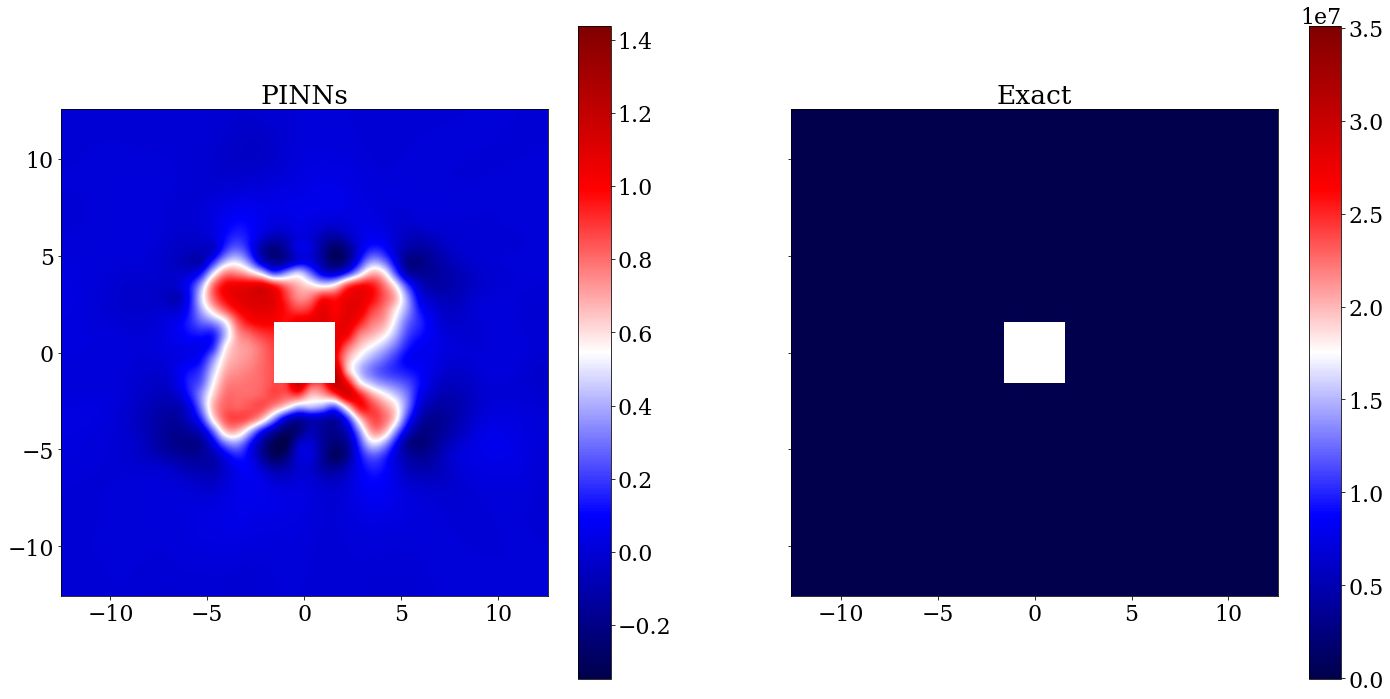

In [3]:
import matplotlib.pyplot as plt
# Square grid with 10 points per wavelength in each direction

Nx = int(np.ceil(dim_x/wave_len * 10))
Ny = Nx


# Grid points
xmin, xmax, ymin, ymax = [-dim_x/2, dim_x/2, -dim_x/2, dim_x/2]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))

points_2d = points[:2, :]

#in_circ = points[0, :]**2 + points[1, :]**2 <= (radius)**2
#in_circ_2d = points_2d[0, :]**2 + points_2d[1, :]**2 <= (radius)**2
#points[0, in_circ] = -radius - wave_len / 10
#points[1, in_circ] = radius + wave_len / 10
#points[2, in_circ] = 0.

# Bounding box tree etc for function evaluations

u_sca = model.predict(points[:2, :].T)
u_sca = u_sca[:, 0] + 1j* u_sca[:, 1]
u_sca = u_sca.reshape((Nx, Ny))

points_2d = points[:2, :]
ide = points_2d[0, :] ** 2 + points_2d[1, :] ** 2 <= 1
ide = ide.reshape((Nx,Nx))


'''                  Compare against analytical solution                    '''
# Uncomment to perform comparison, takes a few seconds to run

u_exact = sol(points.T)
u_exact = u_exact[:, 0] + 1j* u_exact[:, 1]
u_exact = u_exact.reshape((Nx, Ny))
diff = u_exact-u_sca
error = np.linalg.norm(diff)/np.linalg.norm(u_exact)
print('Relative error = ', error)

'''                     Plot field and save figure                          '''
plt.rc('font', family='serif', size=22)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (24,12))

matrix = np.fliplr(np.real(u_sca)).T
matrix = np.ma.masked_where(ide , matrix)
pcm = ax1.imshow(matrix,
           extent=[-dim_x/2,dim_x/2,-dim_x/2,dim_x/2],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label='PINN')

#ax1.axis('off')
fig.colorbar(pcm, ax = ax1)


matrix = np.fliplr(np.real(u_exact)).T
matrix = np.ma.masked_where(ide , matrix)
pcm = ax2.imshow(matrix,
           extent=[-dim_x/2,dim_x/2,-dim_x/2,dim_x/2],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label = 'Exact')


#ax1.axis('off')
ax1.set_title('PINNs')
ax2.set_title('Exact')
fig.colorbar(pcm, ax = ax2)
